# Kelvin's age dating of the Earth  
As already discussed in the lecture, Kelvin calculated the age of the Earth using "hard physical facts". In this notebook, we want to follow his thoughts and try to plot the graphs he drawed:

![](https://raw.githubusercontent.com/darius74/geothermics/master/imgs/kelvin.png) 

How did Kelvin calculate the age of the Earth? His "physical facts" were some "measurements":

* Temperature at the Earth'core, hard to determine, Kelvin made some "educated guesses" 3870 $^\circ$C-5540 $^\circ$C based on some experiments with rocks. This is the initial temperature Kelvin used in his calculation.
* Temperature gradient: 36.5 K km$^{-1}$ (from measurements in mines).
* Thermal diffusivity: 1.2 $\times$ 10$^{-6}$ m$^{2}$ s$^{-1}$ (measured on three rock samples from the Edinburgh area...). 


Kelvin used the analytical solution for the one dimensional heat trasport equation:

$$\frac{\partial T (x,t)}{\partial t}=\,\kappa \,\frac{\partial^2 T(x,t)}{\partial x^2}$$
which is:
$$T (x,t)=T_{ini}\, erf\left(\frac{x}{2\sqrt{\kappa \cdot t}}\right)$$
Here, we assume that the surface is held constant a T=0 $^\circ$C, thus the original $\Delta$T becomes $T_{ini}$.

The gradient is:
$$\frac{\partial T (x,t)}{\partial x}=\frac{T_{ini}}{\sqrt{\pi\cdot \kappa \, \cdot t}}\mathrm{e}^{-x^2/4 \,\kappa \, t}$$

Using this expression, try to calculate the age of the Earth according to Kelvin. You can vary the initial temperature, which is the temperature at the Earth's core (Kelvin's "educated guesses").

In [3]:
import numpy as np
#from pylab import *
# calculate time from this for measured Tgrad at the surface x=0:
from scipy import special

# Parameters Kelvin used:
Tini=3850; # Initial temperature assumed, try different values!
kappa=1.2e-6; # Thermal diffusivity
Tgrad=0.0365; # Temperature gradient

yr2s=365*24*60*60

# calculate the age of the Earth according to Kelvin:

# write a nice ouput
tkelvin = Tini**2/(Tgrad**2*np.pi*kappa)/yr2s

print("The age of the Earth according to Kelvin is {} million years".format(np.round(tkelvin/10**6),1))



The age of the Earth according to Kelvin is 94.0 million years


Now we want to take a look at the graphs showing the vertical temperature profile and the temperature gradient
Write some code which produces a plot showing temperature versus depth, using the natural unit $a$:

$$a=2\sqrt{\kappa \cdot t}$$

Use the time calculated before as input.

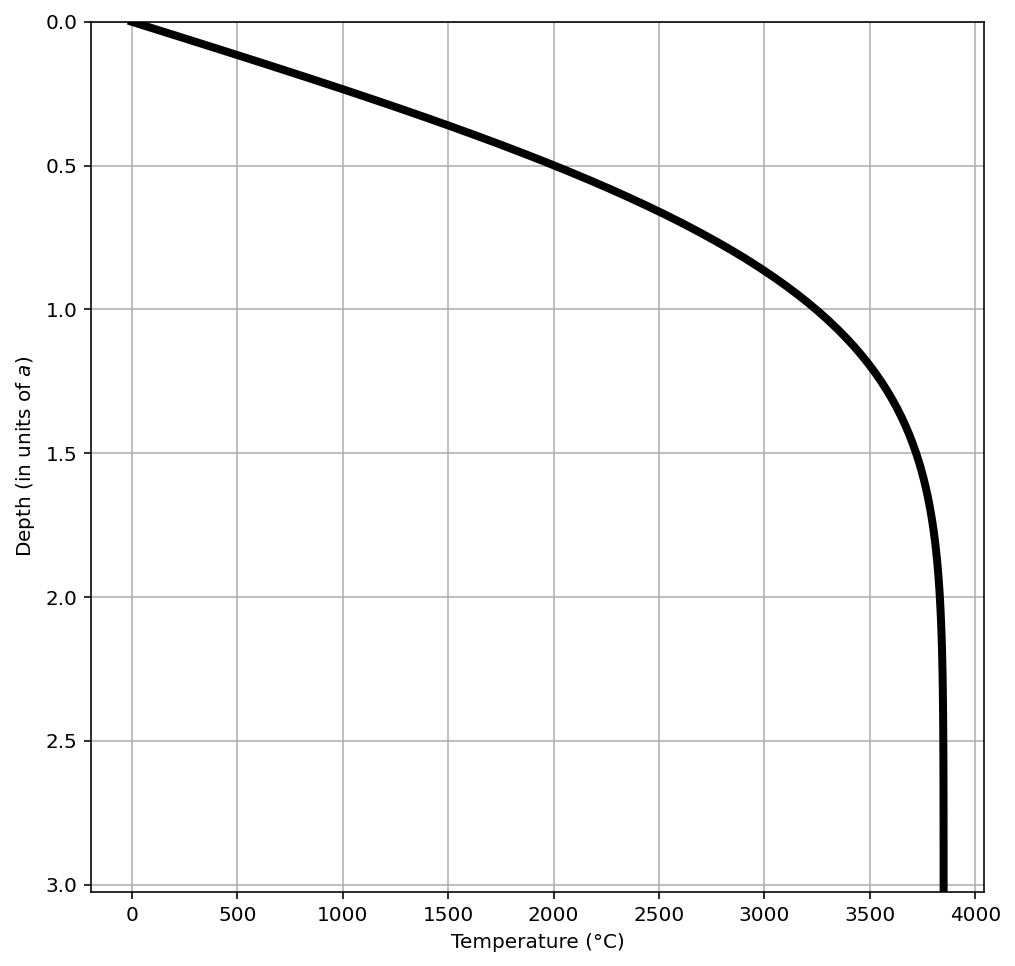

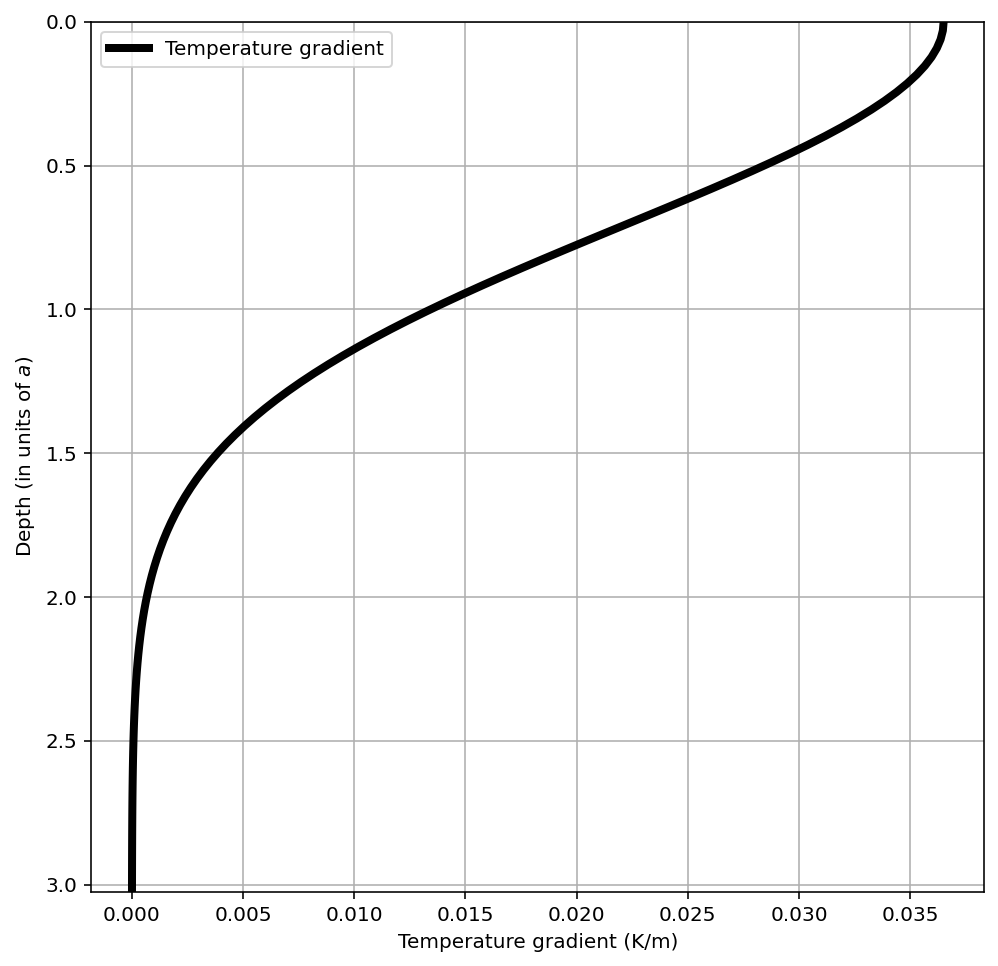

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

%matplotlib inline



# TO DO: Parameter a, here you you need the age of the Earth according to Kelvin from above


x = np.linspace(0, 360000,100)
a=2*np.sqrt(kappa*tkelvin*yr2s); # Parameter a

# print(a)
xa=x/a  # Use a as depth unit (characteristic depth)
 # Analytical solution of the one dimensional heat transport equation
T= Tini*special.erf(xa)

#TO DO: time dependent temperature gradient beta at depth x:
beta=Tini/np.sqrt(np.pi*kappa*tkelvin*yr2s)*np.exp(-xa**2);

# TO DO plotting the temperature profile after time t (replace t for other times)
fig = plt.figure(figsize=[8,8])
plt.plot(T,xa,'-', linewidth=4, color='black', label='Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (in units of $a$)')
plt.ylim(np.max(xa),0)
plt.grid(True)

# TO DO: plotting the gradient

fig = plt.figure(figsize=[8,8])
plt.plot(beta,xa,'-', linewidth=4, color='black', label='Temperature gradient')
plt.legend()
plt.xlabel('Temperature gradient (K/m)')
plt.ylabel('Depth (in units of $a$)')
plt.ylim(np.max(xa),0)
plt.grid(True)


